<a href="https://colab.research.google.com/github/Somu112/Machine-Learning/blob/main/Forecast_Cab_Booking_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***1. Import the required libraries and load the training and testing dataset***

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import plotly
import pandas_profiling
import pickle
import re
from pandas_profiling import ProfileReport
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.graph_objects as go
from IPython.display import display
from ipywidgets import interactive, interact
import ipywidgets
from plotly.colors import hex_to_rgb
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from datetime import datetime
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold, cross_val_score, RepeatedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.svm import SVC, SVR



In [2]:
print('Pandas: ',pd.__version__)
print('Numpy: ',np.__version__)
print('Re: ',re.__version__)
print('IPYWidgets: ',ipywidgets.__version__)
print('Sklearn: ',sklearn.__version__)
print('Plotly: ',plotly.__version__)

Pandas:  1.1.5
Numpy:  1.19.5
Re:  2.2.1
IPYWidgets:  7.6.5
Sklearn:  1.0.1
Plotly:  4.4.1


***2. Analyze the dataset and write your observations***

In [3]:
train = pd.read_csv('/content/train.csv')
train_label = pd.read_csv('/content/train_label.csv')
test = pd.read_csv('/content/test.csv')
test_label = pd.read_csv('/content/test_label.csv')

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [5]:
train['Total_booking'] = train_label
test['Total_booking'] = test_label

In [6]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,5.0
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,139.0
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,209.0
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,184.0
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,791.0


*a. Check the shape of the training and testing set*

In [7]:
train.shape, test.shape

((8708, 10), (2178, 10))

In [8]:
train_len = len(train) - 1
test_len = len(test) - 1
train_len, test_len

(8707, 2177)

In [9]:
data = pd.concat([train, test])

In [10]:
data.reset_index(drop=True, inplace=True)

In [11]:
data.shape

(10886, 10)

In [12]:
cols = list(data.columns)

*b. Print the data types of each column*

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       10886 non-null  object 
 1   season         10886 non-null  object 
 2   holiday        10886 non-null  int64  
 3   workingday     10886 non-null  int64  
 4   weather        10886 non-null  object 
 5   temp           10886 non-null  float64
 6   atemp          10886 non-null  float64
 7   humidity       10886 non-null  int64  
 8   windspeed      10886 non-null  float64
 9   Total_booking  10884 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 850.6+ KB


*c. Check the missing values present in the dataset*

In [14]:
def check_miss(data):
  '''
  data: requires a DataFrame object.
  ---
  returns : A DataFrame with details about missing values
  '''
  cnull = [sum(data[y].isnull()) for y in data.columns]
  miss = pd.DataFrame({
      'Null Values': [any(data[x].isnull()) for x in data.columns],
      'Count_Nulls': cnull,
      'Percentage_Nulls': list((np.array(cnull) * 100) / data.shape[0]),
      'MValues': cnull,
      'Dtype': data.dtypes
  })
  return miss.sort_values(by='MValues', ascending=False)

In [15]:
check_miss(data)

,Null Values,Count_Nulls,Percentage_Nulls,MValues,Dtype
Total_booking,True,2,0.018372,2,float64
datetime,False,0,0.000000,0,object
season,False,0,0.000000,0,object
holiday,False,0,0.000000,0,int64
workingday,False,0,0.000000,0,int64
weather,False,0,0.000000,0,object
temp,False,0,0.000000,0,float64
atemp,False,0,0.000000,0,float64
humidity,False,0,0.000000,0,int64
windspeed,False,0,0.000000,0,float64


***3. Perform Feature Engineering***

In [16]:
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [17]:
#output = ProfileReport(data)
#output.to_notebook_iframe()

In [18]:
orig_data = data.copy()

***5. Perform Correlation Analysis:***

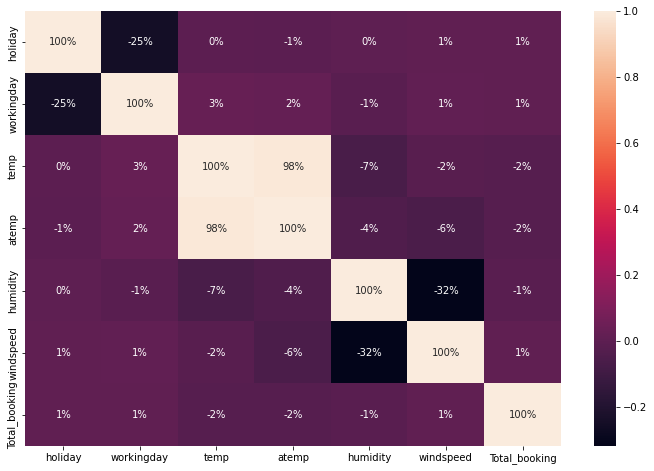

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(orig_data.corr(),annot=True, fmt='.0%')

*b. Write down your inference in the markdown cell*


In [20]:
#treatments for high correlated column and we can drop any one of them to avoid the multicollinearity, or we can take average of both and drop both columns to avoid multicolinearity
data['Avg_temp'] = (data['temp'] + data['atemp'])/2
data['Avg_temp'] = data['Avg_temp'].astype(int)
data = data.drop(['temp','atemp'], axis=1)

*a. Create new columns date, hour,weekDay,monthfrom datetimecolumn*

In [21]:
data['datetime'] = pd.to_datetime(data['datetime'])
data['Hour'] = data['datetime'].dt.hour
data['Date'] = data['datetime'].dt.date
data['WeekDay'] = data['datetime'].dt.dayofweek
data['month'] = data['datetime'].dt.month
data.head()

,datetime,season,holiday,workingday,weather,humidity,windspeed,Total_booking,Avg_temp,Hour,Date,WeekDay,month
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,77,16.9979,5.0,23,19,2012-05-02,2,5
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,79,19.0012,139.0,31,4,2012-09-05,2,9
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,50,22.0028,209.0,5,9,2011-01-13,3,1
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,29,8.9981,184.0,15,16,2011-11-18,4,11
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,51,19.0012,791.0,31,13,2011-09-13,1,9


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10884 entries, 0 to 10884
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       10884 non-null  datetime64[ns]
 1   season         10884 non-null  object        
 2   holiday        10884 non-null  int64         
 3   workingday     10884 non-null  int64         
 4   weather        10884 non-null  object        
 5   humidity       10884 non-null  int64         
 6   windspeed      10884 non-null  float64       
 7   Total_booking  10884 non-null  float64       
 8   Avg_temp       10884 non-null  int64         
 9   Hour           10884 non-null  int64         
 10  Date           10884 non-null  object        
 11  WeekDay        10884 non-null  int64         
 12  month          10884 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(3)
memory usage: 1.2+ MB


*b. Coerce the datatype of season,holiday,workingday,and weatherto category*

In [23]:
data['season'] = data['season'].astype('category')
data['holiday'] = data['holiday'].astype('category')
data['weather'] = data['weather'].astype('category')
data['workingday'] = data['workingday'].astype('category')
data['Total_booking'] = data['Total_booking'].astype(float)


*c. Drop the datetimecolumn as we have already extracted useful features from it*

In [24]:
data = data.drop(['datetime'], axis=1)

In [25]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  11


,season,holiday,workingday,weather,humidity,windspeed,Total_booking,Avg_temp,Hour,WeekDay,month
0,Summer,0,1,Clear + Few clouds,77,16.9979,5.0,23,19,2,5
1,Fall,0,1,Clear + Few clouds,79,19.0012,139.0,31,4,2,9
2,Spring,0,1,Clear + Few clouds,50,22.0028,209.0,5,9,3,1
3,Winter,0,1,Clear + Few clouds,29,8.9981,184.0,15,16,4,11
4,Fall,0,1,Clear + Few clouds,51,19.0012,791.0,31,13,1,9


***3. Perform Outlier Analysis:***

In [26]:
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25 and feature not in ['season']+['holiday']+['workingday']+['weather']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 3


In [27]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature + ['season']+['holiday']+['workingday']+['weather']]
print("Continuous feature Count {}".format(len(continuous_feature)))


Continuous feature Count 4


In [28]:
continuous_feature

['humidity', 'windspeed', 'Total_booking', 'Avg_temp']

*a. Plot Box plotsacross various features like season, hour of the day, working_day,etc to see if there are any Outlierand note downyour inference*

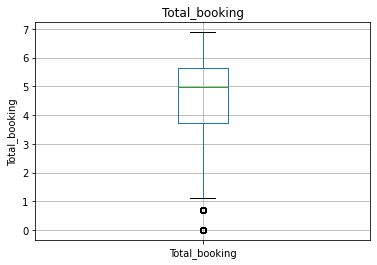

In [29]:
for feature in continuous_feature:
  dataset = data.copy()
  if 0 in data[feature].unique():
    pass
  else:
    dataset[feature]=np.log(dataset[feature])
    dataset.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [30]:
discrete_feature

['Hour', 'WeekDay', 'month']

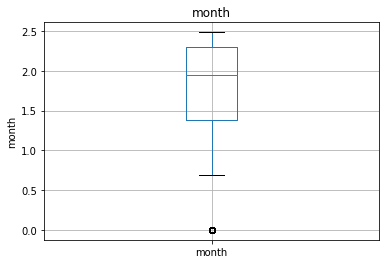

In [31]:
for feature in discrete_feature:
  dataset = data.copy()
  if 0 in data[feature].unique():
    pass
  else:
    dataset[feature]=np.log(dataset[feature])
    dataset.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

*b. Remove the outliers present in the dataset*

In [32]:
Q1_month = data.month.quantile(0.25)
Q3_month = data.month.quantile(0.75)
Q1_temp = data.Avg_temp.quantile(0.25)
Q3_temp = data.Avg_temp.quantile(0.75)
Q1_Total_booking = data.Total_booking.quantile(0.25)
Q3_Total_booking = data.Total_booking.quantile(0.75)

In [33]:
Q1_month, Q3_month, Q1_temp , Q3_temp , Q1_Total_booking, Q3_Total_booking 


(4.0, 10.0, 15.0, 28.0, 42.0, 284.0)

In [34]:
IQR_month = Q3_month - Q1_month
IQR_temp = Q3_temp - Q1_temp
IQR_Total_booking = Q3_Total_booking -Q1_Total_booking

In [35]:
IQR_month, IQR_temp, IQR_Total_booking 


(6.0, 13.0, 242.0)

In [36]:
lower_limit_month = Q1_month - 1.5*IQR_month
lower_limit_temp = Q1_temp - 1.5*IQR_temp
lower_limit_Total_booking = Q1_Total_booking - 1.5*IQR_Total_booking 

upper_limit_month = Q3_month + 1.5*IQR_month
upper_limit_temp = Q3_temp + 1.5*IQR_temp
upper_limit_Total_booking = Q3_Total_booking + 1.5*IQR_Total_booking

In [37]:
lower_limit_month, upper_limit_month, lower_limit_temp, upper_limit_temp, lower_limit_Total_booking ,upper_limit_Total_booking  


(-5.0, 19.0, -4.5, 47.5, -321.0, 647.0)

In [38]:
data[(data.month<lower_limit_month) | (data.month>upper_limit_month)]

,season,holiday,workingday,weather,humidity,windspeed,Total_booking,Avg_temp,Hour,Date,WeekDay,month


In [39]:
data[(data.Avg_temp<lower_limit_temp) | (data.Avg_temp>upper_limit_temp)]


,season,holiday,workingday,weather,humidity,windspeed,Total_booking,Avg_temp,Hour,Date,WeekDay,month


In [40]:
data[(data.Total_booking<lower_limit_Total_booking) | (data.Total_booking>upper_limit_Total_booking)]


,season,holiday,workingday,weather,humidity,windspeed,Total_booking,Avg_temp,Hour,Date,WeekDay,month
4,Fall,0,1,Clear + Few clouds,51,19.0012,791.0,31,13,2011-09-13,1,9
26,Winter,0,1,Mist + Cloudy,93,0.0000,813.0,16,7,2012-12-03,0,12
29,Summer,0,1,Clear + Few clouds,41,31.0009,872.0,28,10,2012-06-04,0,6
51,Winter,0,1,Clear + Few clouds,75,7.0015,790.0,12,9,2012-12-19,2,12
69,Spring,0,1,Mist + Cloudy,64,6.0032,669.0,9,5,2012-01-09,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10676,Spring,0,1,Mist + Cloudy,29,26.0027,823.0,17,13,2012-03-09,4,3
10697,Winter,0,1,Clear + Few clouds,47,12.9980,729.0,20,1,2012-10-11,3,10
10744,Summer,0,1,Clear + Few clouds,54,12.9980,849.0,31,19,2011-06-06,0,6
10822,Spring,0,0,Clear + Few clouds,33,19.9995,811.0,20,21,2012-02-18,5,2


In [41]:
data.shape

(10884, 12)

In [42]:
data = data[(data.Total_booking>lower_limit_Total_booking) & (data.Total_booking<upper_limit_Total_booking)]

In [43]:
data.shape

(10581, 12)

In [44]:
train_no_outlier = train[(train.Total_booking>lower_limit_Total_booking) & (train.Total_booking<upper_limit_Total_booking)]
test_no_outlier = test[(test.Total_booking>lower_limit_Total_booking) & (test.Total_booking<upper_limit_Total_booking)]

In [45]:
train_len = len(train_no_outlier)
test_len = len(test_no_outlier)
train_len , test_len

(8461, 2120)

In [46]:
data["holiday"] =  data["holiday"].astype(float)
data["workingday"] =  data["workingday"].astype(float)

In [47]:
df = pd.get_dummies(data)

In [48]:
#fig = px.scatter_matrix(df)
#fig.show()

***6. Perform Data Visualization:***

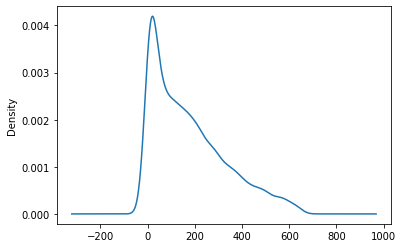

In [49]:
data['Total_booking'].plot.kde()

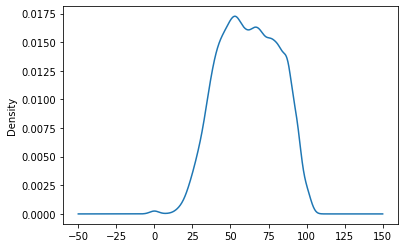

In [50]:
data['humidity'].plot.kde()

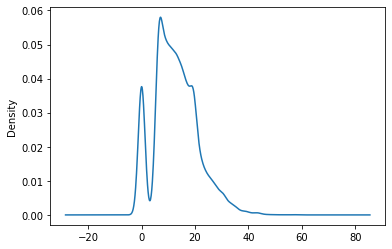

In [51]:
data['windspeed'].plot.kde()

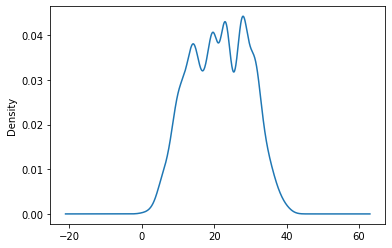

In [52]:
data['Avg_temp'].plot.kde()

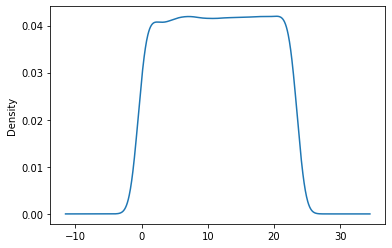

In [53]:
data['Hour'].plot.kde()

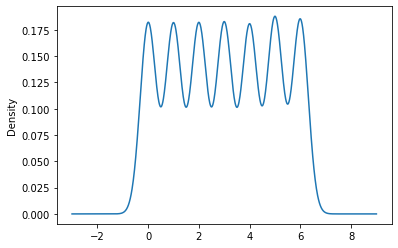

In [54]:
data['WeekDay'].plot.kde()

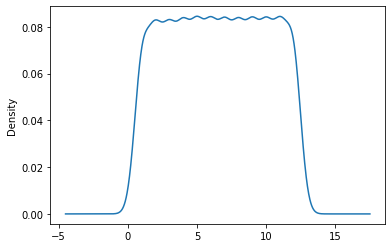

In [55]:
data['month'].plot.kde()

In [56]:
def plot_value_counts_bar(data, col):
  '''
  data: DataFrame
  col: Name of the column to be plotted
  ----
  returns a plotly figure
  '''
  vc = pd.DataFrame(data[col].value_counts())
  vc['cat'] = vc.index 
  fig = px.bar(vc, x='cat', y=col, color='cat', title=col)
  fig.update_layout()

  return fig

*a. Visualize distribution of data: total_bookingcolumn and plot the probability distribution plot for the column as well*

In [57]:
plot_value_counts_bar(data, 'Total_booking')

In [58]:
plot_value_counts_bar(data, 'season')

In [59]:
plot_value_counts_bar(data, 'holiday')

In [60]:
plot_value_counts_bar(data, 'humidity')

In [61]:
plot_value_counts_bar(data, 'weather')

In [62]:
plot_value_counts_bar(data, 'windspeed')

In [63]:
plot_value_counts_bar(data, 'Avg_temp')

In [64]:
plot_value_counts_bar(data, 'Hour')

In [65]:
plot_value_counts_bar(data, 'WeekDay')

In [66]:
plot_value_counts_bar(data, 'month')

*b. Use Histogramsto plot all the continuousvariables present in the data*

In [67]:
fig = px.bar(data, x='month', y='Total_booking')
fig.show()

In [68]:
fig = px.bar(data, x='season', y='Total_booking')
fig.show()

In [69]:
fig = px.bar(data, x='Hour', y='Total_booking')
fig.show()

In [70]:
fig = px.bar(data, x='WeekDay', y='Total_booking')
fig.show()

*c. Use Histogramsto plot all the continuousvariables present in the data*

In [71]:
continuous_feature

['humidity', 'windspeed', 'Total_booking', 'Avg_temp']

In [72]:
fig = px.histogram(data, x='Total_booking')
fig.show()

In [73]:
fig = px.histogram(data, x='humidity')
fig.show()

In [74]:
fig = px.histogram(data, x='windspeed')
fig.show()

In [75]:
fig = px.histogram(data, x='Avg_temp')
fig.show()

In [76]:
data.head(15)

,season,holiday,workingday,weather,humidity,windspeed,Total_booking,Avg_temp,Hour,Date,WeekDay,month
0,Summer,0.0,1.0,Clear + Few clouds,77,16.9979,5.0,23,19,2012-05-02,2,5
1,Fall,0.0,1.0,Clear + Few clouds,79,19.0012,139.0,31,4,2012-09-05,2,9
2,Spring,0.0,1.0,Clear + Few clouds,50,22.0028,209.0,5,9,2011-01-13,3,1
3,Winter,0.0,1.0,Clear + Few clouds,29,8.9981,184.0,15,16,2011-11-18,4,11
5,Fall,0.0,1.0,Clear + Few clouds,36,22.0028,395.0,22,17,2012-08-17,4,8
6,Winter,0.0,0.0,Clear + Few clouds,73,12.9980,5.0,27,9,2012-10-06,5,10
7,Fall,0.0,1.0,Clear + Few clouds,68,19.0012,9.0,23,4,2012-09-10,0,9
8,Fall,0.0,0.0,"Light Snow, Light Rain",61,7.0015,78.0,29,4,2012-07-14,5,7
9,Spring,0.0,0.0,Clear + Few clouds,56,11.0014,129.0,13,18,2011-02-06,6,2
10,Spring,0.0,1.0,Clear + Few clouds,62,32.9975,390.0,20,15,2012-01-17,1,1


In [77]:
data['weather'].unique()

[' Clear + Few clouds', ' Light Snow, Light Rain', ' Mist + Cloudy ', ' Heavy Rain + Thunderstorm ']
Categories (4, object): [' Clear + Few clouds', ' Light Snow, Light Rain', ' Mist + Cloudy ',
                         ' Heavy Rain + Thunderstorm ']

In [78]:
data['weather']=data['weather'].replace(['Light Snow, Light Rain'], 'Light Rain')
data['weather']=data['weather'].replace([' Clear + Few clouds'],'Clear')
data['weather']=data['weather'].replace([' Mist + Cloudy '],'Cloudy')
data['weather']=data['weather'].replace([' Heavy Rain + Thunderstorm '],'Heavy Rain')

***7. Convert the categorical variables into one hot vector***

In [79]:
one = OneHotEncoder(handle_unknown='ignore', sparse=False)
categorical_column = data[['season','weather']]
one.fit(categorical_column)

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [80]:
colnames = one.get_feature_names(['season','weather'])
categorical_column_encoded = pd.DataFrame(one.fit_transform(categorical_column), columns=colnames)
categorical_column_encoded

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,season_Fall,season_Spring,season_Summer,season_Winter,"weather_ Light Snow, Light Rain",weather_Clear,weather_Cloudy,weather_Heavy Rain
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
10576,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
10577,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
10578,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10579,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [81]:
data_encoded = pd.concat([data, categorical_column_encoded], axis=1, join='inner')
data_encoded.shape

(10283, 20)

In [82]:
data.shape

(10581, 12)

In [83]:
data_encoded.reset_index(drop=True, inplace=True)
data_encoded.head()

,season,holiday,workingday,weather,humidity,windspeed,Total_booking,Avg_temp,Hour,Date,WeekDay,month,season_Fall,season_Spring,season_Summer,season_Winter,"weather_ Light Snow, Light Rain",weather_Clear,weather_Cloudy,weather_Heavy Rain
0,Summer,0.0,1.0,Clear,77,16.9979,5.0,23,19,2012-05-02,2,5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,Fall,0.0,1.0,Clear,79,19.0012,139.0,31,4,2012-09-05,2,9,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Spring,0.0,1.0,Clear,50,22.0028,209.0,5,9,2011-01-13,3,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Winter,0.0,1.0,Clear,29,8.9981,184.0,15,16,2011-11-18,4,11,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,Fall,0.0,1.0,Clear,36,22.0028,395.0,22,17,2012-08-17,4,8,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [84]:
data_encoded = data_encoded.drop(['season','weather'], axis=1)
data_encoded.head()

,holiday,workingday,humidity,windspeed,Total_booking,Avg_temp,Hour,Date,WeekDay,month,season_Fall,season_Spring,season_Summer,season_Winter,"weather_ Light Snow, Light Rain",weather_Clear,weather_Cloudy,weather_Heavy Rain
0,0.0,1.0,77,16.9979,5.0,23,19,2012-05-02,2,5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,79,19.0012,139.0,31,4,2012-09-05,2,9,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,50,22.0028,209.0,5,9,2011-01-13,3,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,29,8.9981,184.0,15,16,2011-11-18,4,11,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,36,22.0028,395.0,22,17,2012-08-17,4,8,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [85]:
from sklearn.preprocessing import MinMaxScaler
data_encoded = data_encoded.drop(['Date'], axis=1)
scaler = MinMaxScaler()
names = data_encoded.columns
d = scaler.fit_transform(data_encoded)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,holiday,workingday,humidity,windspeed,Total_booking,Avg_temp,Hour,WeekDay,month,season_Fall,season_Spring,season_Summer,season_Winter,"weather_ Light Snow, Light Rain",weather_Clear,weather_Cloudy,weather_Heavy Rain
0,0.0,1.0,0.77,0.298225,0.006202,0.547619,0.826087,0.333333,0.363636,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.79,0.333373,0.213953,0.738095,0.173913,0.333333,0.727273,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.50,0.386035,0.322481,0.119048,0.391304,0.500000,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.29,0.157870,0.283721,0.357143,0.695652,0.666667,0.909091,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.36,0.386035,0.610853,0.523810,0.739130,0.666667,0.636364,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [86]:
train = scaled_df.iloc[:train_len,:]
test = scaled_df.iloc[train_len:,:]

In [87]:
train.head()

,holiday,workingday,humidity,windspeed,Total_booking,Avg_temp,Hour,WeekDay,month,season_Fall,season_Spring,season_Summer,season_Winter,"weather_ Light Snow, Light Rain",weather_Clear,weather_Cloudy,weather_Heavy Rain
0,0.0,1.0,0.77,0.298225,0.006202,0.547619,0.826087,0.333333,0.363636,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.79,0.333373,0.213953,0.738095,0.173913,0.333333,0.727273,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.50,0.386035,0.322481,0.119048,0.391304,0.500000,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.29,0.157870,0.283721,0.357143,0.695652,0.666667,0.909091,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.36,0.386035,0.610853,0.523810,0.739130,0.666667,0.636364,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [88]:
test.shape

(1822, 17)

In [89]:
test = test.drop(['Total_booking'], axis=1)

In [90]:
X=train.drop(['Total_booking'],axis=1)
y=train['Total_booking']

***8. Split your dataset for training and testing***

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=200)

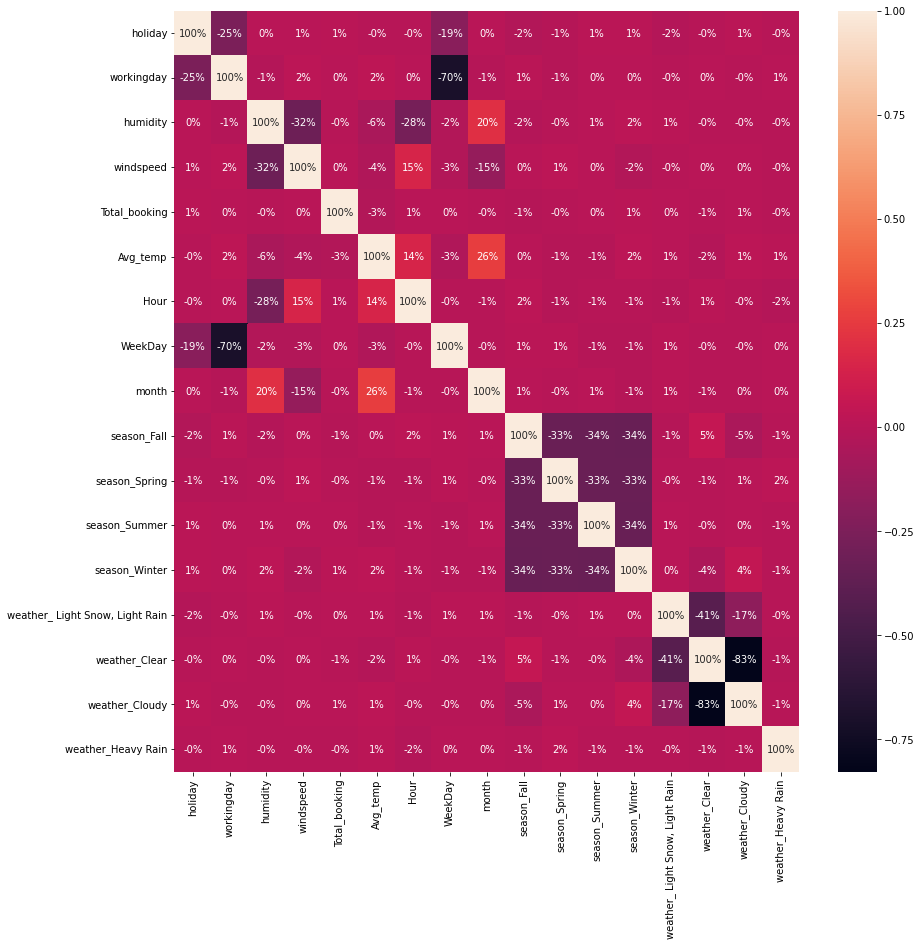

In [92]:
plt.figure(figsize=(14,14))
sns.heatmap(data_encoded.corr(),annot=True,fmt='.0%')

In [93]:
#sns.pairplot(train, hue='Total_booking')

***9. Fit various models (Random Forest Regressor, Ada Boost Regressor, BaggingRegressor, SVR, and K-Neighbors Regressor)***

In [94]:
def cross_validation_score(ml_model,cols= X_train.columns):
  i = 1
  cv_scores=[]

  kf = KFold(n_splits=5,random_state=42,shuffle=True)
  for train_index,test_index in kf.split(X_train,y_train):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    model = ml_model
    model.fit(X_train, y_train)
    pred_val = model.predict(X_test)

    rsme_score = sqrt(mean_squared_error(y_test, pred_val))
    msg = ""
    msg += "RSME score: {}".format(rsme_score)
    print("{}".format(msg))

    #save score
    cv_scores.append(rsme_score)
    i+=1
  return cv_scores

In [95]:
dtree_scores = cross_validation_score(DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20))


1 of kfold 5
RSME score: 0.27768310681601144

2 of kfold 5
RSME score: 0.27751553723217043

3 of kfold 5
RSME score: 0.27751553723217043

4 of kfold 5
RSME score: 0.27751553723217043

5 of kfold 5
RSME score: 0.27751553723217043


In [96]:
knn_scores = cross_validation_score(KNeighborsRegressor(n_neighbors=2))


1 of kfold 5
RSME score: 0.29695721855521545

2 of kfold 5
RSME score: 0.29695721855521545

3 of kfold 5
RSME score: 0.29695721855521545

4 of kfold 5
RSME score: 0.29695721855521545

5 of kfold 5
RSME score: 0.29695721855521545


In [97]:
linreg_dtree = pd.DataFrame({'DTree':dtree_scores, 'KNN':knn_scores})
linreg_dtree.head()

,DTree,KNN
0,0.277683,0.296957
1,0.277516,0.296957
2,0.277516,0.296957
3,0.277516,0.296957
4,0.277516,0.296957


Text(0.5, 1.0, 'RMSE Score')

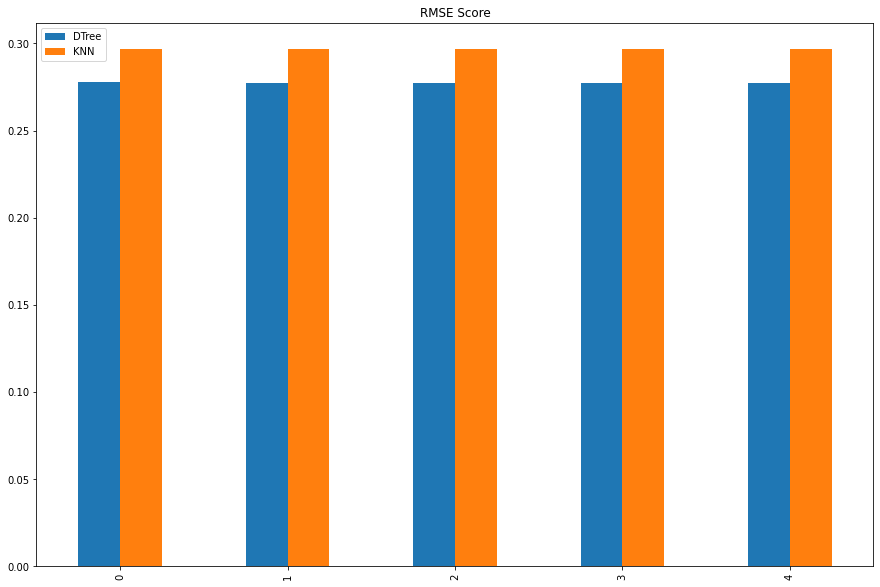

In [98]:
y = ['DTree', 'KNN']
linreg_dtree.plot(y=y, kind="bar", figsize=(15,10))
plt.title("RMSE Score")

***10. Display a Factorplot to visualize the RMSEvalues achieved by different modeling algorithm***

In [99]:
rfr_scores= cross_validation_score(RandomForestRegressor())


1 of kfold 5
RSME score: 0.24720042115605909

2 of kfold 5
RSME score: 0.2468100532029185

3 of kfold 5
RSME score: 0.24734471377135478

4 of kfold 5
RSME score: 0.24696214608327513

5 of kfold 5
RSME score: 0.24722047182726453


In [100]:
abr_scores = cross_validation_score(AdaBoostRegressor())


1 of kfold 5
RSME score: 0.24571808527982753

2 of kfold 5
RSME score: 0.24372445180582164

3 of kfold 5
RSME score: 0.24970460878442274

4 of kfold 5
RSME score: 0.24609105936451758

5 of kfold 5
RSME score: 0.24947248889045953


In [101]:
br_scores = cross_validation_score(BaggingRegressor())


1 of kfold 5
RSME score: 0.25758270480521833

2 of kfold 5
RSME score: 0.25900582352819174

3 of kfold 5
RSME score: 0.2583502560003538

4 of kfold 5
RSME score: 0.25998740267247894

5 of kfold 5
RSME score: 0.2584018951083


In [102]:
svr_scores = cross_validation_score(SVR())


1 of kfold 5
RSME score: 0.2487289444806207

2 of kfold 5
RSME score: 0.2487289444806207

3 of kfold 5
RSME score: 0.2487289444806207

4 of kfold 5
RSME score: 0.2487289444806207

5 of kfold 5
RSME score: 0.2487289444806207


Text(0.5, 1.0, 'RMSE Score')

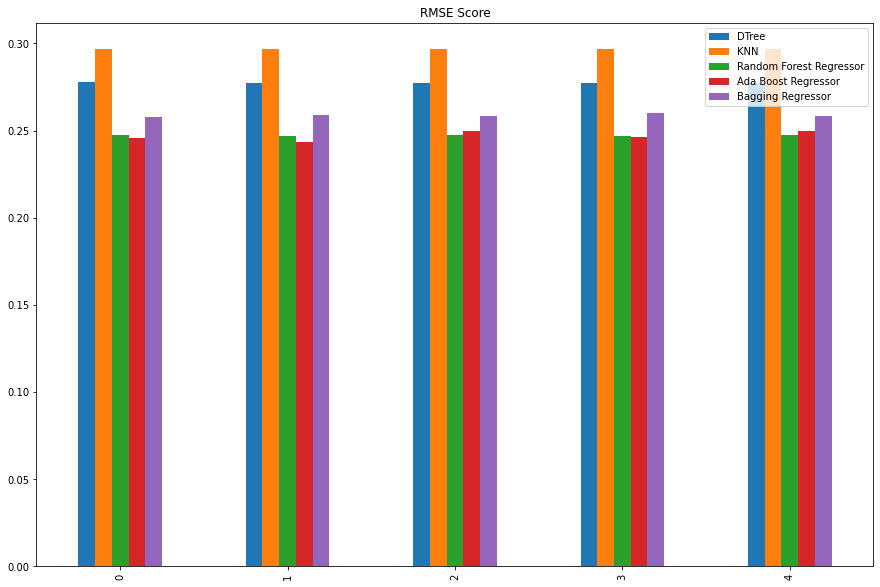

In [103]:
linreg_dtree = pd.DataFrame({ 'DTree': dtree_scores, 'KNN':knn_scores, 
                             'Random Forest Regressor':rfr_scores,'Ada Boost Regressor':abr_scores, 'Bagging Regressor' : br_scores })
linreg_dtree.head()
y=[ 'DTree', 'KNN', 'Random Forest Regressor','Ada Boost Regressor', 'Bagging Regressor']

linreg_dtree.plot(y=y, kind="bar", figsize=(15,10))
plt.title("RMSE Score")

***11. Perform Hyper-parameter tuning on the best model using GridSearchCVand print the best parameters using model.best_params_***

In [104]:
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
model = {'linear_regression':LinearRegression(), 'DTree': DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20), 'KNN':KNeighborsRegressor(n_neighbors=2), 'Ridge':Ridge(alpha=1.0),'Lasso':Lasso(alpha=0.1)}
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
print(grid)

GridSearchCV(estimator={'DTree': DecisionTreeRegressor(min_samples_leaf=5,
                                                       min_samples_split=20),
                        'KNN': KNeighborsRegressor(n_neighbors=2),
                        'Lasso': Lasso(alpha=0.1), 'Ridge': Ridge(),
                        'linear_regression': LinearRegression()},
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])})


In [105]:
rf_params = {'random_state': 24, 'n_estimators': 25, 'max_depth': 20, 'n_jobs': -1, "min_samples_split": 2}
rf_scores = cross_validation_score(RandomForestRegressor(**rf_params))


1 of kfold 5
RSME score: 0.2498552625055675

2 of kfold 5
RSME score: 0.2498552625055675

3 of kfold 5
RSME score: 0.2498552625055675

4 of kfold 5
RSME score: 0.2498552625055675

5 of kfold 5
RSME score: 0.2498552625055675


In [106]:
params = {'n_estimators': 25, 'max_depth': 20, 'min_samples_split': 2,'learning_rate': 0.01, 'loss': 'ls'}
gb_scores = cross_validation_score(GradientBoostingRegressor(**params))


1 of kfold 5


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning:

The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.



RSME score: 0.24219885439014477

2 of kfold 5


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning:

The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.



RSME score: 0.24223293637121135

3 of kfold 5


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning:

The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.



RSME score: 0.242124877410191

4 of kfold 5


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning:

The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.



RSME score: 0.2423503283859015

5 of kfold 5


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning:

The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.



RSME score: 0.24229639740259154


In [107]:
ada_scores = cross_validation_score(AdaBoostRegressor(n_estimators=50, random_state=0))


1 of kfold 5
RSME score: 0.24407337231596654

2 of kfold 5
RSME score: 0.24407337231596654

3 of kfold 5
RSME score: 0.24407337231596654

4 of kfold 5
RSME score: 0.24407337231596654

5 of kfold 5
RSME score: 0.24407337231596654


In [108]:
xgb_scores= cross_validation_score(XGBRegressor(max_depth=15,learning_rate=0.1,n_estimators=50, min_child_weight=5,
                                                random_state=42,objective='reg:squarederror',reg_lambda=5))


1 of kfold 5
RSME score: 0.2521854483126908

2 of kfold 5
RSME score: 0.2521854483126908

3 of kfold 5
RSME score: 0.2521854483126908

4 of kfold 5
RSME score: 0.2521854483126908

5 of kfold 5
RSME score: 0.2521854483126908


In [109]:
rf_gb = pd.DataFrame({'Random Forest':rf_scores, 'Gradient Boosting Regressor': gb_scores,'AdaBoost Regressor':ada_scores,'XGBRegressor':xgb_scores})
rf_gb.head()

,Random Forest,Gradient Boosting Regressor,AdaBoost Regressor,XGBRegressor
0,0.249855,0.242199,0.244073,0.252185
1,0.249855,0.242233,0.244073,0.252185
2,0.249855,0.242125,0.244073,0.252185
3,0.249855,0.242350,0.244073,0.252185
4,0.249855,0.242296,0.244073,0.252185


Text(0.5, 1.0, 'RMSE Score')

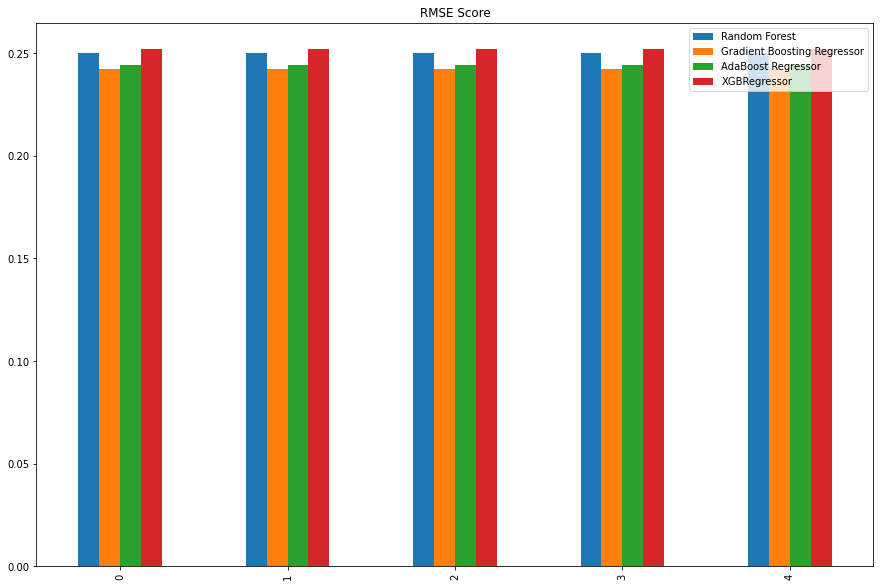

In [110]:
y1=["Random Forest", "Gradient Boosting Regressor","AdaBoost Regressor","XGBRegressor"]
rf_gb.plot(y=y1, kind="bar", figsize=(15,10))
plt.title("RMSE Score")

***12. Perform prediction on the test set and print the mean_squared_log_error***

In [111]:
# define the model
model = GradientBoostingRegressor()

# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate the model
n_scores = cross_val_score(model, X_train,y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# report performance
from statistics import mean, stdev
print('MAE: %.3f (%.3f)' % (mean(n_scores), stdev(n_scores)))

MAE: -0.201 (0.005)


In [112]:
model.fit(X_train,y_train)

GradientBoostingRegressor()

In [113]:
yhat = model.predict(X_test)
yhat

array([0.25396901, 0.24494534, 0.25999783, ..., 0.33041227, 0.2779085 ,
       0.27646733])

In [114]:
msle = mean_squared_log_error(y_test, yhat)  
msle

0.03263383953652913